# Thực hiện visualize dataset để chia các configs cho semi-supervised hợp lí

Import thư viện

In [7]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Tổng số lượng ảnh

In [ ]:
def count_images_in_folder(folder):
    # Định nghĩa các phần mở rộng của ảnh (chuyển về chữ thường để so sánh)
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}
    count = 0
    for file in os.listdir(folder):
        ext = os.path.splitext(file)[1].lower()
        if ext in image_extensions:
            count += 1
    return count

# Giả sử folder gốc là thư mục hiện tại (".")
root_folder = "pascal_data/JPEGImages"
total_images = count_images_in_folder(root_folder)
print("Tổng số ảnh của bộ PascalVOC:", total_images)

Tổng số ảnh của bộ PascalVOC: 17125


Tổng số lượng ảnh có nhãn segmentation

In [ ]:
def count_images_in_folder(folder):
    # Định nghĩa các phần mở rộng của ảnh (chuyển về chữ thường để so sánh)
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}
    count = 0
    for file in os.listdir(folder):
        ext = os.path.splitext(file)[1].lower()
        if ext in image_extensions:
            count += 1
    return count

# Giả sử folder gốc là thư mục hiện tại (".")
root_folder = "pascal_data/SegmentationClass"
total_images = count_images_in_folder(root_folder)
print("Tổng số ảnh có nhãn:", total_images)

Tổng số ảnh có nhãn: 2913


Xem phân phối số lượng segment của mỗi classes

In [ ]:
import os
import numpy as np
from PIL import Image

# Đường dẫn tới folder chứa ảnh segmentation (annotation)
segmentation_folder = 'pascal_data/SegmentationClass'

# Lấy danh sách file ảnh segmentation
segmentation_files = os.listdir(segmentation_folder)

# Dictionary để lưu các ảnh cho từng lớp
class_to_images = {}

# Duyệt qua từng ảnh segmentation
for seg_file in segmentation_files:
    seg_path = os.path.join(segmentation_folder, seg_file)
    mask = np.array(Image.open(seg_path))
    
    # Lấy các nhãn duy nhất có trong ảnh
    classes = np.unique(mask)
    
    # Cập nhật dictionary: loại bỏ nhãn void (thường là 255)
    for c in classes:
        if c == 255:  # Nếu giá trị 255 đại diện cho void, bạn có thể bỏ qua
            continue
        if c not in class_to_images:
            class_to_images[c] = []
        class_to_images[c].append(seg_file)

# Hiển thị số lượng ảnh chứa mỗi lớp
for cls, img_list in class_to_images.items():
    print(f"Lớp {cls}: {len(img_list)} ảnh")


Lớp 0: 2903 ảnh
Lớp 1: 178 ảnh
Lớp 15: 888 ảnh
Lớp 20: 157 ảnh
Lớp 19: 167 ảnh
Lớp 4: 150 ảnh
Lớp 9: 271 ảnh
Lớp 12: 249 ảnh
Lớp 3: 208 ảnh
Lớp 2: 144 ảnh
Lớp 5: 183 ảnh
Lớp 17: 120 ảnh
Lớp 11: 157 ảnh
Lớp 13: 147 ảnh
Lớp 14: 157 ảnh
Lớp 18: 183 ảnh
Lớp 10: 135 ảnh
Lớp 7: 255 ảnh
Lớp 8: 250 ảnh
Lớp 6: 152 ảnh
Lớp 16: 167 ảnh


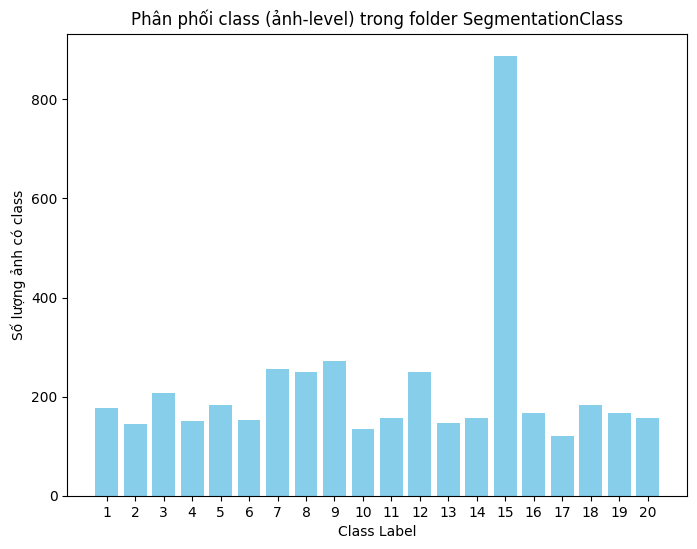

Phân phối class (ảnh-level): {np.uint8(1): 178, np.uint8(15): 888, np.uint8(20): 157, np.uint8(19): 167, np.uint8(4): 150, np.uint8(9): 271, np.uint8(12): 249, np.uint8(3): 208, np.uint8(2): 144, np.uint8(5): 183, np.uint8(17): 120, np.uint8(11): 157, np.uint8(13): 147, np.uint8(14): 157, np.uint8(18): 183, np.uint8(10): 135, np.uint8(7): 255, np.uint8(8): 250, np.uint8(6): 152, np.uint8(16): 167}


In [5]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def plot_class_distribution_image_level(segmentation_folder, ignore_classes=[0, 255]):
    """
    Hàm này duyệt qua các file segmentation trong folder,
    nếu trong ảnh có xuất hiện một class nào đó (ngoại trừ các class trong ignore_classes),
    thì cộng 1 cho class đó (tính theo số lượng ảnh có chứa class đó).

    Parameters:
        segmentation_folder (str): Đường dẫn tới folder chứa segmentation masks.
        ignore_classes (list): Danh sách các nhãn cần loại bỏ (mặc định: [0, 255]).
    
    Returns:
        class_counts (dict): Dictionary chứa số lần xuất hiện của mỗi class
                             (key: label, value: số ảnh có chứa label đó).
    """
    class_counts = {}

    # Duyệt qua tất cả file trong folder
    for filename in os.listdir(segmentation_folder):
        if not filename.endswith('.png'):
            continue
        mask_path = os.path.join(segmentation_folder, filename)
        mask = np.array(Image.open(mask_path))
        
        # Lấy danh sách các nhãn duy nhất xuất hiện trong ảnh
        unique_labels = np.unique(mask)
        # Với mỗi nhãn, nếu nó không thuộc ignore, cộng 1 cho class_counts
        for label in unique_labels:
            if label in ignore_classes:
                continue
            class_counts[label] = class_counts.get(label, 0) + 1

    # Sắp xếp các nhãn theo thứ tự tăng dần
    sorted_labels = sorted(class_counts.keys())
    sorted_counts = [class_counts[label] for label in sorted_labels]

    # Vẽ biểu đồ phân phối
    plt.figure(figsize=(8, 6))
    plt.bar(sorted_labels, sorted_counts, color='skyblue')
    plt.xlabel("Class Label")
    plt.ylabel("Số lượng ảnh có class")
    plt.title("Phân phối class (ảnh-level) trong folder SegmentationClass")
    plt.xticks(sorted_labels)
    plt.show()

    return class_counts

# Ví dụ sử dụng:
segmentation_folder = "pascal_data/SegmentationClass"
distribution = plot_class_distribution_image_level(segmentation_folder)
print("Phân phối class (ảnh-level):", distribution)


Phân phối class (ảnh-level): {np.uint8(1): 178, np.uint8(15): 888, np.uint8(20): 157, np.uint8(19): 167, np.uint8(4): 150, np.uint8(9): 271, np.uint8(12): 249, np.uint8(3): 208, np.uint8(2): 144, np.uint8(5): 183, np.uint8(17): 120, np.uint8(11): 157, np.uint8(13): 147, np.uint8(14): 157, np.uint8(18): 183, np.uint8(10): 135, np.uint8(7): 255, np.uint8(8): 250, np.uint8(6): 152, np.uint8(16): 167}


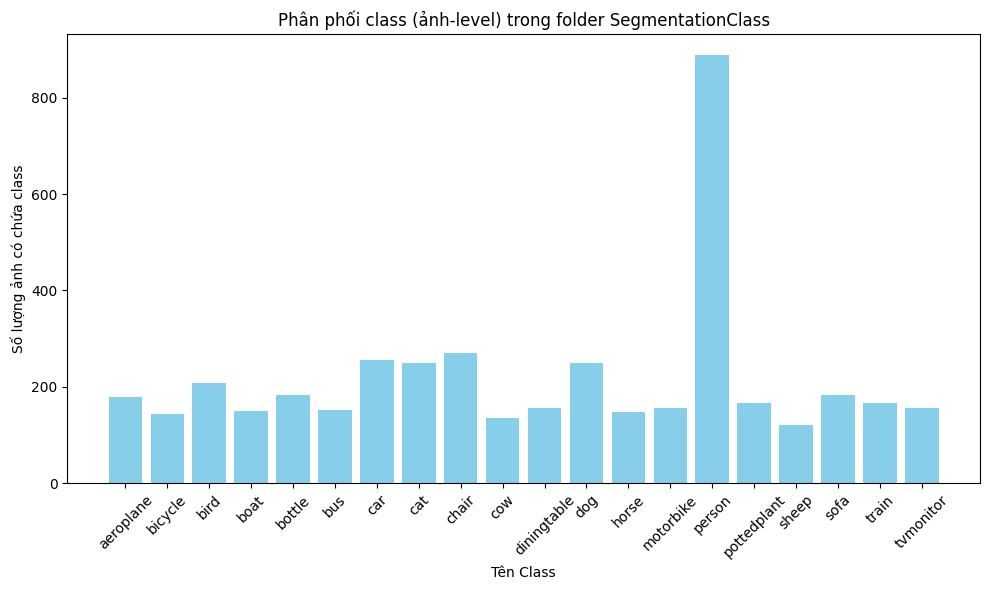

In [6]:
# Mapping từ label sang tên class của Pascal VOC 2012 (lớp 0 là background)
VOC_CLASSES = {
    0: 'background',
    1: 'aeroplane',
    2: 'bicycle',
    3: 'bird',
    4: 'boat',
    5: 'bottle',
    6: 'bus',
    7: 'car',
    8: 'cat',
    9: 'chair',
    10: 'cow',
    11: 'diningtable',
    12: 'dog',
    13: 'horse',
    14: 'motorbike',
    15: 'person',
    16: 'pottedplant',
    17: 'sheep',
    18: 'sofa',
    19: 'train',
    20: 'tvmonitor'
}

def plot_class_distribution_image_level(segmentation_folder, ignore_classes=[0, 255]):
    """
    Duyệt qua các file segmentation trong folder,
    nếu trong ảnh có xuất hiện một class nào đó (ngoại trừ các class trong ignore_classes),
    thì cộng 1 cho class đó (tính theo số lượng ảnh có chứa class đó).

    Parameters:
        segmentation_folder (str): Đường dẫn tới folder chứa segmentation masks.
        ignore_classes (list): Danh sách các nhãn cần loại trừ (mặc định: [0, 255]).
    
    Returns:
        class_counts (dict): Dictionary chứa số ảnh có chứa mỗi class 
                             (key: label, value: count).
    """
    class_counts = {}
    for filename in os.listdir(segmentation_folder):
        if not filename.endswith('.png'):
            continue
        mask_path = os.path.join(segmentation_folder, filename)
        mask = np.array(Image.open(mask_path))
        unique_labels = np.unique(mask)
        for label in unique_labels:
            if label in ignore_classes:
                continue
            # Nếu một ảnh có xuất hiện label này, cộng 1
            class_counts[label] = class_counts.get(label, 0) + 1
    return class_counts

# Đường dẫn tới folder chứa segmentation masks (ví dụ: "pascal_data/SegmentationClass")
segmentation_folder = "pascal_data/SegmentationClass"

# Tính phân phối theo ảnh-level
distribution = plot_class_distribution_image_level(segmentation_folder)
print("Phân phối class (ảnh-level):", distribution)

# Sắp xếp theo thứ tự label tăng dần
sorted_labels = sorted(distribution.keys())
sorted_counts = [distribution[label] for label in sorted_labels]
# Chuyển label thành tên class theo VOC_CLASSES
sorted_class_names = [VOC_CLASSES.get(label, str(label)) for label in sorted_labels]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(sorted_class_names, sorted_counts, color='skyblue')
plt.xlabel("Tên Class")
plt.ylabel("Số lượng ảnh có chứa class")
plt.title("Phân phối class (ảnh-level) trong folder SegmentationClass")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
import os
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt

########################################
# 1. XÂY DỰNG HÀM VÀ CẤU TRÚC DỮ LIỆU
########################################

def get_labels_from_mask(mask_path, ignore_classes=[0, 255]):
    """
    Đọc mask từ file và trả về tập các nhãn có trong ảnh, loại trừ ignore_classes (0, 255).
    """
    mask = np.array(Image.open(mask_path))
    labels = set(np.unique(mask))
    return labels - set(ignore_classes)

def build_image_class_map(segmentation_folder, ignore_classes=[0, 255]):
    """
    Duyệt qua folder segmentation, trả về:
      image_class_map: dict {file_id: set(classes)}
        - file_id: "2007_000032" (không kèm đuôi .png)
        - set(classes): tập các nhãn (int) có trong ảnh
    """
    image_class_map = {}
    for filename in os.listdir(segmentation_folder):
        if not filename.endswith('.png'):
            continue
        file_id, _ = os.path.splitext(filename)
        mask_path = os.path.join(segmentation_folder, filename)
        labels = get_labels_from_mask(mask_path, ignore_classes)
        if labels:
            image_class_map[file_id] = labels
    return image_class_map

def build_class_to_images(image_class_map):
    """
    Tạo dict {class_label: list file_id} từ image_class_map.
    """
    class_to_images = {}
    for file_id, classes in image_class_map.items():
        for c in classes:
            class_to_images.setdefault(c, []).append(file_id)
    return class_to_images

def save_list_file(pairs, file_path):
    """
    Ghi danh sách (img_path, seg_path) hoặc (img_path) vào file.
    pairs: list các tuple/string
    Nếu tuple: (JPEG_path, SEG_path)
    Nếu string: chỉ 1 đường dẫn (dành cho unlabeled).
    """
    with open(file_path, "w") as f:
        for item in pairs:
            if isinstance(item, tuple):
                # Ghi theo format: "JPEGImages/xxx.jpg SegmentationClass/xxx.png"
                f.write(f"{item[0]} {item[1]}\n")
            else:
                # Ghi 1 đường dẫn
                f.write(f"{item}\n")

In [11]:
########################################
# 2. CÁC THÔNG TIN VỀ FOLDER VÀ HÀM TIỆN ÍCH
########################################

# Đường dẫn folder
jpeg_folder = "pascal_data/JPEGImages"
seg_folder = "pascal_data/SegmentationClass"

# Số ảnh labeled cần
NUM_LABELED = 1464

# Hàm lấy danh sách file id
def get_file_ids(folder, extension):
    ids = set()
    for fn in os.listdir(folder):
        if fn.endswith(extension):
            base, _ = os.path.splitext(fn)
            ids.add(base)
    return ids

jpeg_ids = get_file_ids(jpeg_folder, ".jpg")   # Ảnh gốc
seg_ids = get_file_ids(seg_folder, ".png")     # Ảnh có segmentation
print(f"Tổng số ảnh trong JPEGImages: {len(jpeg_ids)}")
print(f"Tổng số ảnh trong SegmentationClass: {len(seg_ids)}")

Tổng số ảnh trong JPEGImages: 17125
Tổng số ảnh trong SegmentationClass: 2913


In [12]:
########################################
# 3. TẠO TẬP CON 1464 ẢNH CÂN BẰNG
########################################

def select_balanced_subset(segmentation_folder, target_num=1464):
    """
    Chọn tập con 'balanced' (theo union) gồm target_num ảnh từ folder segmentation.
    Cách làm:
      - Duyệt tất cả ảnh -> image_class_map
      - class_to_images: mapping class -> list ảnh
      - Lấy số ảnh tối thiểu min_count = min(len(imgs) for imgs in class_to_images.values())
      - Với mỗi lớp, lấy ngẫu nhiên min_count ảnh
      - Union tất cả -> balanced_set
      - Nếu balanced_set > target_num: rút gọn random
      - Nếu balanced_set < target_num: bổ sung random từ pool
    Trả về list file_id (không kèm .png).
    """
    image_class_map = build_image_class_map(segmentation_folder)
    if not image_class_map:
        return []
    
    class_to_imgs = build_class_to_images(image_class_map)
    # Tính số ảnh tối thiểu
    min_count = min(len(imgs) for imgs in class_to_imgs.values())
    print("Số ảnh tối thiểu xuất hiện của 1 lớp:", min_count)
    
    sampled_sets = []
    for c, img_list in class_to_imgs.items():
        if len(img_list) > min_count:
            subset = set(random.sample(img_list, min_count))
        else:
            subset = set(img_list)
        sampled_sets.append(subset)
    balanced_set = set.union(*sampled_sets)
    print("Số ảnh sau khi union:", len(balanced_set))

    # Tất cả ảnh có segmentation (chỉ tính ảnh nào có class_map)
    all_seg_images = set(image_class_map.keys())
    
    # Điều chỉnh cho đủ target_num
    if len(balanced_set) > target_num:
        balanced_set = set(random.sample(list(balanced_set), target_num))
    elif len(balanced_set) < target_num:
        needed = target_num - len(balanced_set)
        remaining = list(all_seg_images - balanced_set)
        if len(remaining) < needed:
            raise ValueError("Không đủ ảnh để bổ sung cho đủ 1464.")
        balanced_set.update(random.sample(remaining, needed))
    
    return sorted(balanced_set)

balanced_ids = select_balanced_subset(seg_folder, NUM_LABELED)
print(f"Số ảnh sau cân bằng: {len(balanced_ids)}")

Số ảnh tối thiểu xuất hiện của 1 lớp: 120
Số ảnh sau khi union: 2058
Số ảnh sau cân bằng: 1464


In [19]:
########################################
# 4. TẠO labeled.txt, val.txt, unlabeled.txt
########################################

# Tập labeled chính là balanced_ids
balanced_set = set(balanced_ids)
# Tập val là seg_ids còn lại
val_set = sorted(list(seg_ids - balanced_set))

# Tập unlabeled là ảnh có trong JPEGImages mà không có segmentation
unlabeled_set = sorted(list(jpeg_ids - seg_ids))

# Tạo nội dung file:
# - labeled.txt: "JPEGImages/<id>.jpg SegmentationClass/<id>.png"
labeled_pairs = [(f"JPEGImages/{fid}.jpg", f"SegmentationClass/{fid}.png") for fid in balanced_ids]
# - val.txt: "JPEGImages/<id>.jpg SegmentationClass/<id>.png"
val_pairs = [(f"JPEGImages/{fid}.jpg", f"SegmentationClass/{fid}.png") for fid in val_set]
# - unlabeled.txt: "JPEGImages/<id>.jpg"
unlabeled_list = [(f"JPEGImages/{fid}.jpg", f"SegmentationClass/{fid}.png") for fid in unlabeled_set]

# Lưu file
save_list_file(labeled_pairs, "labeled.txt")
save_list_file(val_pairs, "val.txt")
save_list_file(unlabeled_list, "unlabeled.txt")

print("Đã tạo 3 file:")
print(f"  labeled.txt: {len(labeled_pairs)} ảnh")
print(f"  val.txt: {len(val_pairs)} ảnh")
print(f"  unlabeled.txt: {len(unlabeled_list)} ảnh")

Đã tạo 3 file:
  labeled.txt: 1464 ảnh
  val.txt: 1449 ảnh
  unlabeled.txt: 14212 ảnh


In [17]:
def read_lines(file_path):
    """
    Đọc file và trả về một tập hợp (set) các dòng (đã strip).
    """
    with open(file_path, 'r') as f:
        lines = f.readlines()
    # Loại bỏ dòng trống và khoảng trắng
    lines = [line.strip() for line in lines if line.strip()]
    return set(lines)

# Đường dẫn tới 3 file
file_labeled = "splits/pascal/1464/labeled.txt"
file_val = "splits/pascal/val.txt"
file_unlabeled = "splits/pascal/1464/unlabeled.txt"

# Đọc nội dung file vào các tập hợp
labeled_set = read_lines(file_labeled)
val_set = read_lines(file_val)
unlabeled_set = read_lines(file_unlabeled)

# Kiểm tra trùng lặp giữa các cặp
intersection_lv = labeled_set.intersection(val_set)
intersection_lu = labeled_set.intersection(unlabeled_set)
intersection_vu = val_set.intersection(unlabeled_set)

# In kết quả
print("Số dòng trùng giữa labeled.txt và val.txt:", len(intersection_lv))
if intersection_lv:
    print("Dòng trùng:", intersection_lv)

print("Số dòng trùng giữa labeled.txt và unlabeled.txt:", len(intersection_lu))
if intersection_lu:
    print("Dòng trùng:", intersection_lu)

print("Số dòng trùng giữa val.txt và unlabeled.txt:", len(intersection_vu))
if intersection_vu:
    print("Dòng trùng:", intersection_vu)


Số dòng trùng giữa labeled.txt và val.txt: 0
Số dòng trùng giữa labeled.txt và unlabeled.txt: 0
Số dòng trùng giữa val.txt và unlabeled.txt: 0


In [2]:
import os

def check_paths_in_txt(root_dir, txt_file):
    """
    Kiểm tra tất cả đường dẫn (image_path, mask_path) trong một file txt
    xem chúng có tồn tại trong thư mục gốc (root_dir) hay không.
    
    Args:
        root_dir: Thư mục gốc chứa JPEGImages/, SegmentationClass/, ...
        txt_file: Đường dẫn đến file txt có format:
                  "JPEGImages/xxx.jpg SegmentationClass/xxx.png"
    
    Returns:
        missing_count: số file không tồn tại
    """
    missing_count = 0
    with open(txt_file, 'r') as f:
        lines = f.read().splitlines()

    for line in lines:
        # Mỗi dòng: "JPEGImages/xxx.jpg SegmentationClass/xxx.png"
        img_path, mask_path = line.split()

        # Tạo đường dẫn tuyệt đối (hoặc ghép root_dir + path)
        abs_img_path = os.path.join(root_dir, img_path)
        abs_mask_path = os.path.join(root_dir, mask_path)

        # Kiểm tra sự tồn tại
        if not os.path.exists(abs_img_path):
            missing_count += 1
        if not os.path.exists(abs_mask_path):
            missing_count += 1

    return missing_count

if __name__ == "__main__":
    root_dir = "pascal_data"              # Thay đường dẫn thư mục gốc
    labeled_txt = "splits/pascal/183/labeled.txt"        # File txt đầu tiên
    unlabeled_txt = "splits/pascal/183/unlabeled.txt"    # File txt thứ hai

    # Kiểm tra file labeled
    missing_labeled = check_paths_in_txt(root_dir, labeled_txt)
    print(f"File labeled: Số file không tồn tại = {missing_labeled}")

    # Kiểm tra file unlabeled
    missing_unlabeled = check_paths_in_txt(root_dir, unlabeled_txt)
    print(f"File unlabeled: Số file không tồn tại = {missing_unlabeled}")

    # Tổng missing
    total_missing = missing_labeled + missing_unlabeled
    print(f"Tổng số file không tồn tại = {total_missing}")


File labeled: Số file không tồn tại = 0
File unlabeled: Số file không tồn tại = 9118
Tổng số file không tồn tại = 9118
